In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/countries_non_pop.csv');

In [10]:
years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']

In [11]:
df_canada = df[df['Country Name'].str.contains("Canada")]

In [14]:
birth_rate = df_canada[df_canada['Indicator Name'] == 'Birth rate, crude (per 1,000 people)'].iloc[:, 5:].T
death_rate = df_canada[df_canada['Indicator Name'] == 'Death rate, crude (per 1,000 people)'].iloc[:, 5:].T
birth_rate.columns = ['Birth Rate']
death_rate.columns = ['Death Rate']
birth_rate.index.name = 'Year'
death_rate.index.name = 'Year'
combined_data = birth_rate.join(death_rate)
combined_data.index = combined_data.index
filtered_data = combined_data[combined_data.index.astype(int) % 5 == 0]

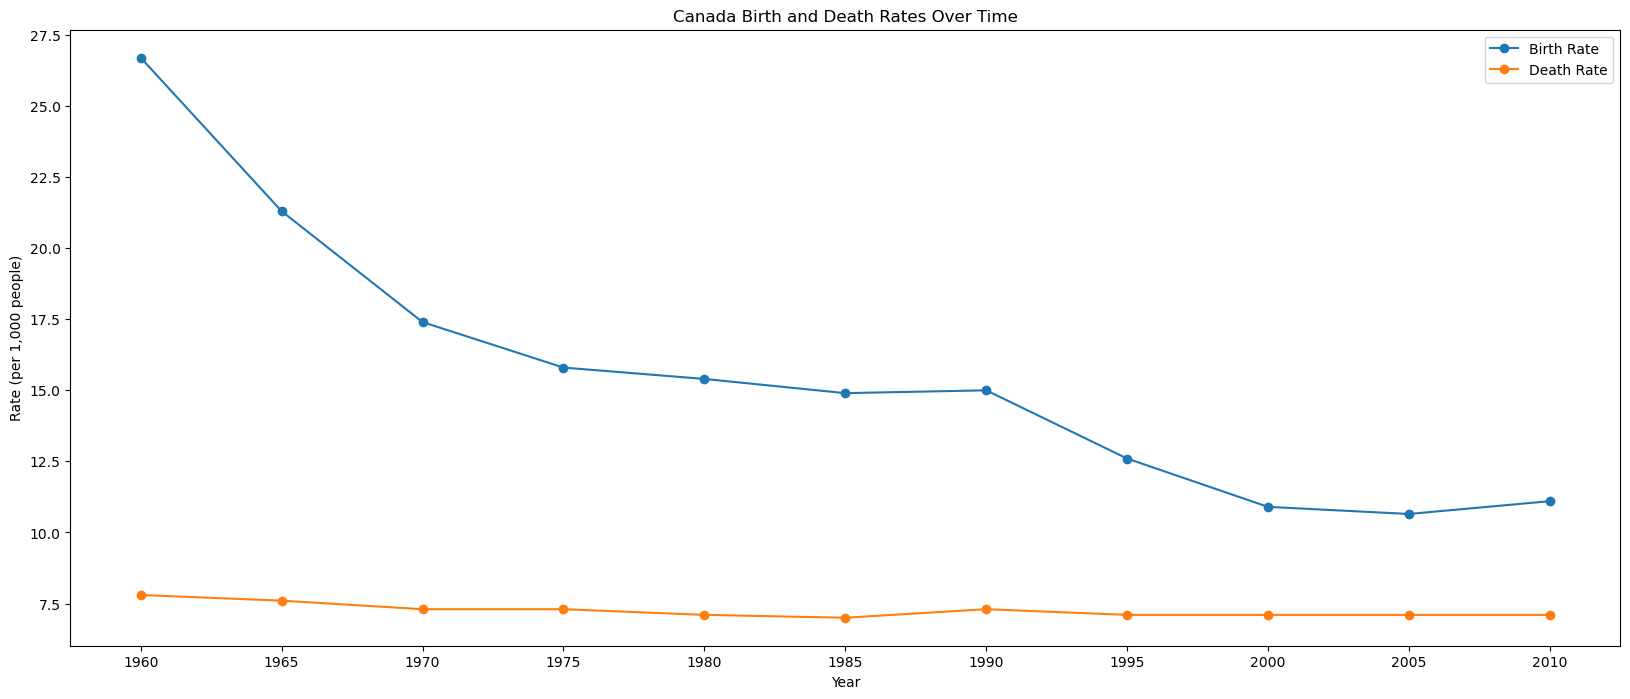

In [15]:
plt.figure(figsize=(20, 8))
plt.plot(filtered_data['Birth Rate'], marker='o', label='Birth Rate')
plt.plot(filtered_data['Death Rate'], marker='o', label='Death Rate')
plt.title('Canada Birth and Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Rate (per 1,000 people)')
plt.legend()
plt.show()